In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 16
label_text_size <- 16
small_text_size <- 16
family <- "ArialMT"
dpi <- 320

In [4]:
hmplot_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/hmplots.RData")))

In [5]:
pcaplot_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/pcaplots.RData")))

In [6]:
set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

rename_axis_title <- function(plt, axis = "x", n_title = "") {
    if (axis == "x") {
        plt <- plt + labs(x = n_title)
    }
    else if (axis == "y") {
        plt <- plt + labs(y = n_title)
    }
    plt
}

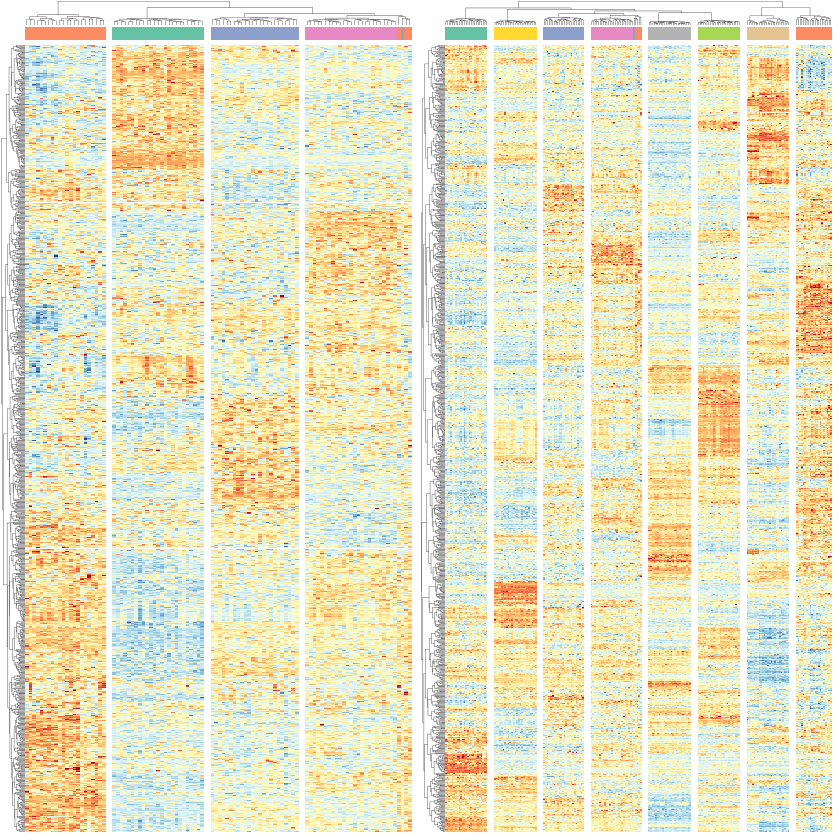

In [7]:
hmplot_list <- c(
    mget("gyn_hmplot"),
    mget("pan_hmplot")
) %>%
    purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0)) })

hm_grid <- plot_grid(
    plotlist = hmplot_list,
    ncol = 2,
#     labels = c("Gynecological only", "Gynecological and other"),
#     label_fontfamily = family,
#     label_size = label_text_size,
#     label_fontface = "bold",
    align = "vh"
)
hm_grid

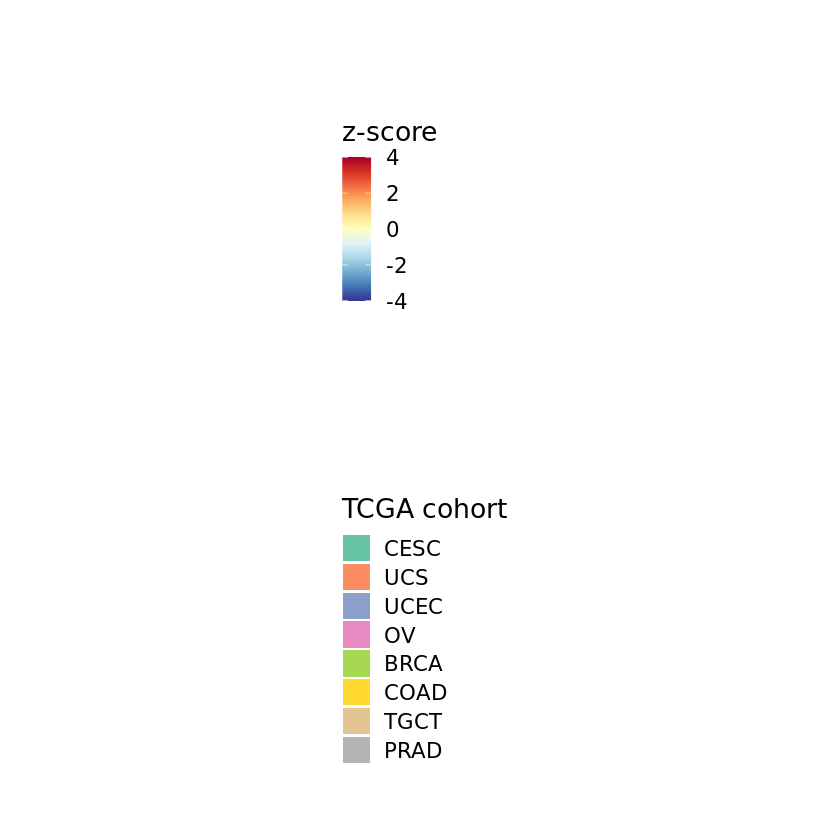

In [11]:
z_legend <- get_legend(
    z_tileplot +
        theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm"), text = element_text(size = text_size, family = family))
)
ctype_legend <- get_legend(
    small_multplot +
        theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm"), text = element_text(size = text_size, family = family))
)
legend_grid <- plot_grid(
    z_legend,
    ctype_legend,
    nrow = 2,
    align = "vh"
)
legend_grid

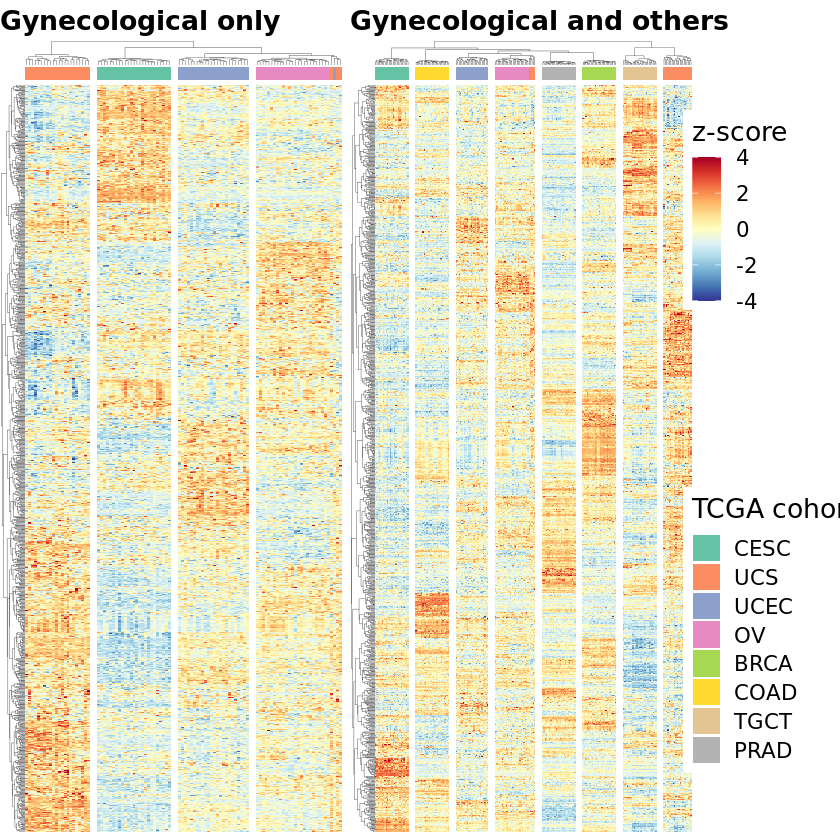

In [12]:
empty_grid <- plot_grid(
    NULL,
    NULL,
    labels = c("Gynecological only", "Gynecological and others"),
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold",
    ncol = 2,
    hjust = 0
)

full_hm_grid <- plot_grid(
    hm_grid,
    legend_grid,
    ncol = 2,
    rel_widths = c(1, 0.16)
)

plt_grid <- plot_grid(
    empty_grid,
    hm_grid,
#     full_hm_grid,
#     plot_grid(sm_grid, scatter_grid, ncol = 2, rel_widths = c(1.2, 1)),
    ncol = 1,
    rel_heights = c(0.05, 1)
)

fig_1 <- plot_grid(
    plt_grid,
    legend_grid,
    ncol = 2,
    rel_widths = c(1, 0.2)
)
fig_1

In [13]:
ggsave(fig_1, filename = paste0(dirs$figures_dir, "/one_off/bmes_figure_1.png"), dpi = dpi, height = 6, width = 12)